In [63]:
import numpy as np 
# data processing 
import pandas as pd 
# data visualization 
import seaborn as sns 
%matplotlib inline 
from matplotlib import pyplot as plt 
from matplotlib import style 
# Algorithms 
from sklearn import linear_model 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import Perceptron 
from sklearn.linear_model import SGDClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC, LinearSVC 
from sklearn.naive_bayes import GaussianNB

In [64]:
test_df = pd.read_csv(r"C:\Users\dell5\Downloads\titanic\test.csv") 
train_df = pd.read_csv(r"C:\Users\dell5\Downloads\titanic\train.csv")

In [65]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
train_df.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
train_df.head(8) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [68]:
total = train_df.isnull().sum().sort_values(ascending=False) 
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100 
percent_2 = (round(percent_1, 1)).sort_values(ascending=False) 
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', 
'%']) 
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Name,0,0.0


In [69]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

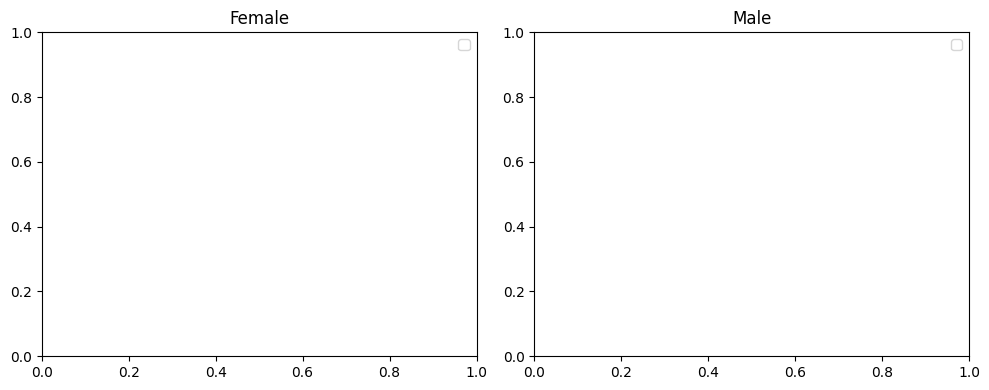

In [109]:
# Define labels
survived = 'Survived' 
not_survived = 'Not Survived' 

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Filter data for women and men
women = train_df[train_df['Sex'] == 'female'] 
men = train_df[train_df['Sex'] == 'male'] 

# Plot for women
sns.histplot(women[women['Survived'] == 1].Age.dropna(), 
             bins=18, 
             ax=axes[0], 
             kde=False, 
             color='blue', 
             stat='density')
sns.histplot(women[women['Survived'] == 0].Age.dropna(), 
             bins=40, 
             ax=axes[0], 
             kde=False, 
             color='red', 
             stat='density')

# Add manual legend for women
axes[0].legend([survived, not_survived], loc='upper right')
axes[0].set_title('Female')

# Plot for men
sns.histplot(men[men['Survived'] == 1].Age.dropna(), 
             bins=18, 
             ax=axes[1], 
             kde=False, 
             color='blue', 
             stat='density')
sns.histplot(men[men['Survived'] == 0].Age.dropna(), 
             bins=40, 
             ax=axes[1], 
             kde=False, 
             color='red', 
             stat='density')

# Add manual legend for men
axes[1].legend([survived, not_survived], loc='upper right')
axes[1].set_title('Male')

# Show the plot
plt.tight_layout()
plt.show()


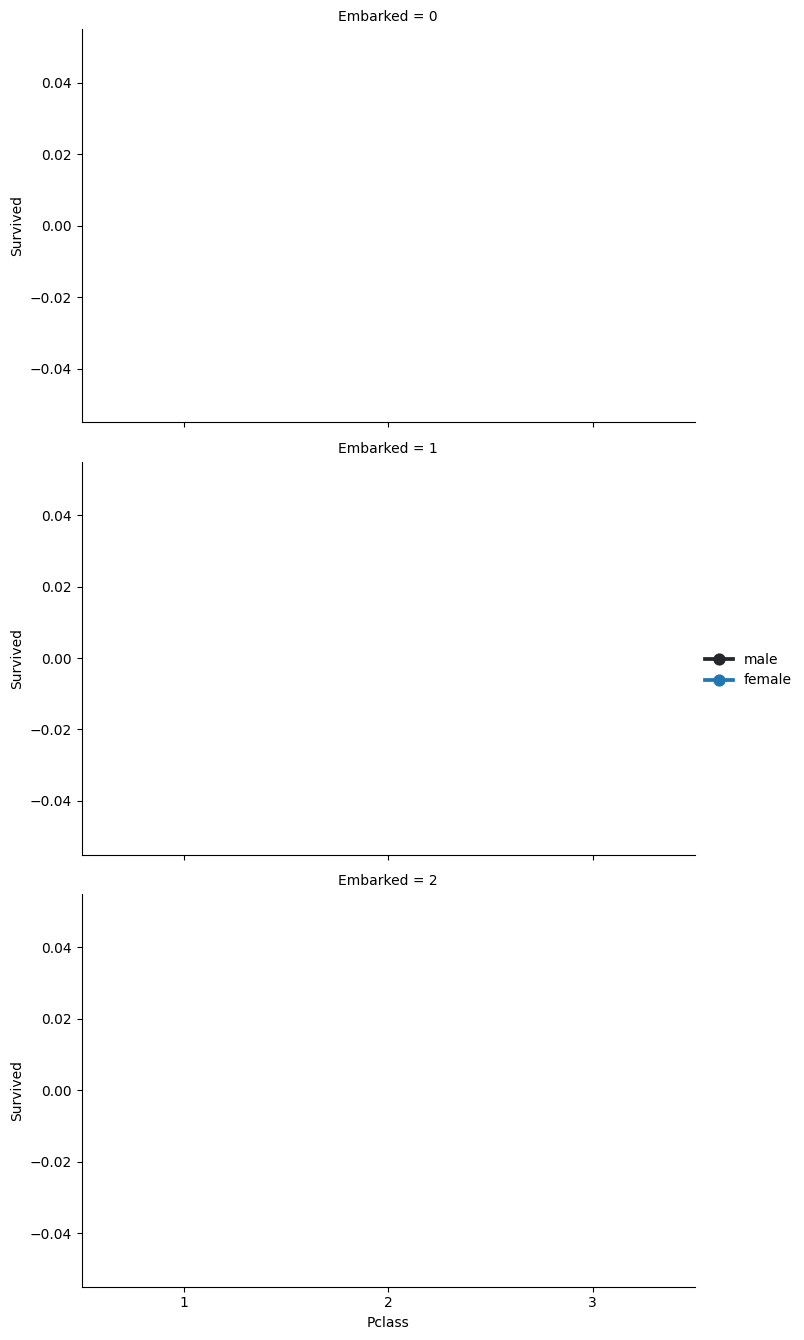

In [106]:

facet_grid = sns.FacetGrid(train_df, row='Embarked', height=4.5, aspect=1.6)

# Define the order of categories
pclass_order = [1, 2, 3]  # Assuming Pclass has values 1, 2, and 3
sex_order = ['male', 'female']  # Assuming 'Sex' is categorical with these values

# Map the pointplot onto the FacetGrid
facet_grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex',
               palette='dark:#1f77b4',
               order=pclass_order,
               hue_order=sex_order)

# Add a legend to the plot
facet_grid.add_legend()

# Show the plot
plt.show()

<Axes: xlabel='Pclass', ylabel='Survived'>

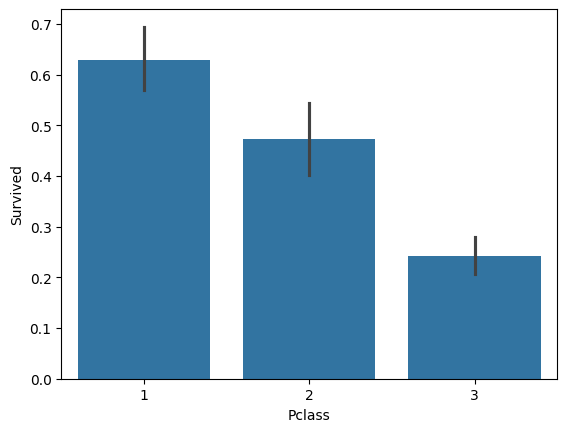

In [72]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

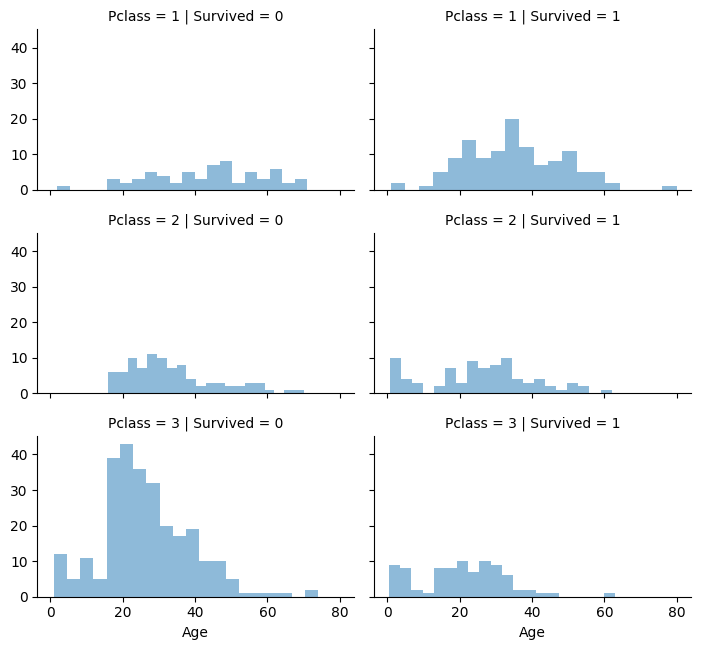

In [73]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6) 
grid.map(plt.hist, 'Age', alpha=.5, bins=20) 
grid.add_legend();

In [74]:
data = [train_df, test_df] 
for dataset in data: 
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch'] 
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0 
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1 
    dataset['not_alone'] = dataset['not_alone'].astype(int) 
train_df['not_alone'].value_counts() 

not_alone
1    537
0    354
Name: count, dtype: int64

In [75]:
# Data Preprocessing
if 'PassengerId' in train_df.columns:
    train_df = train_df.drop(['PassengerId'], axis=1)

In [76]:
print(train_df.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'relatives', 'not_alone'],
      dtype='object')


In [77]:
import re


deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}


In [78]:
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")  # Fill NaN values
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

# Drop the Cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)


In [79]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()

    # Compute random numbers between the mean, std, and is_null
    rand_age = np.random.randint(mean - std, mean + std, size=is_null)

    # Fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice

# Ensure Age is an integer type
train_df["Age"] = train_df["Age"].astype(int)

# Check for NaN values in Age column
print(train_df["Age"].isnull().sum())  # Should output 0


0


In [80]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

# Display summary of the Embarked column
print(train_df['Embarked'].describe())


count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object


In [81]:
#Converting Features
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)  # Fill NaN values with 0
    dataset['Fare'] = dataset['Fare'].astype(int)  # Convert Fare to int


In [82]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
data = [train_df, test_df]

for dataset in data:
    # Extract titles
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+).', expand=False)
    
    # Replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 
                                                  'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 
                                                  'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    # Convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    
    # Fill NaN values with 0 for Title
    dataset['Title'] = dataset['Title'].fillna(0)


In [83]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)


In [84]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)


In [85]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)


In [86]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)


In [87]:
#Creating Categories
data = [train_df, test_df]

for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)  # Ensure Age is an integer
    dataset.loc[dataset['Age'] <= 11, 'Age'] = 0  # Assign 0 for ages <= 11
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1  # Assign 1 for ages 12-18
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2  # Assign 2 for ages 19-22
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3  # Assign 3 for ages 23-27
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4  # Assign 4 for ages 28-33
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5  # Assign 5 for ages 34-40
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6  # Assign 6 for ages 41-66
    dataset.loc[dataset['Age'] > 66, 'Age'] = 6  # Assign 6 for ages > 66

# Check the distribution of Age
print(train_df['Age'].value_counts())


Age
4    163
6    157
5    154
3    137
2    122
1     90
0     68
Name: count, dtype: int64


In [88]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0  # Assign 0 for fares <= 7.91
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1  # Assign 1 for fares 7.91-14.454
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2  # Assign 2 for fares 14.454-31
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare'] = 3  # Assign 3 for fares 31-99
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare'] = 4  # Assign 4 for fares 99-250
    dataset.loc[dataset['Fare'] > 250, 'Fare'] = 5  # Assign 5 for fares > 250

# Convert Fare to int
for dataset in data:
    dataset['Fare'] = dataset['Fare'].astype(int)


In [89]:
#Creating new Features
data = [train_df, test_df]

# Calculate Age_Class
for dataset in data:
    dataset['Age_Class'] = dataset['Age'] * dataset['Pclass']

# Calculate Fare_Per_Person
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare'] / (dataset['relatives'] + 1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

# Display the first 10 rows of the training set
train_df.head(10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1.0,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3.0,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2.0,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3.0,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1.0,15,1
5,0,3,0,1,0,0,1,2,0,1,8,1.0,3,1
6,0,1,0,6,0,0,3,0,0,1,5,1.0,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4.0,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3.0,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3.0,2,1


In [90]:
#Building Machine Learning Models 
X_train = train_df.drop("Survived", axis=1) 
Y_train = train_df["Survived"] 
X_test = test_df.drop("PassengerId", axis=1).copy() 

In [91]:
#Stochastic Gradient Descent 
sgd = linear_model.SGDClassifier(max_iter=5, tol=None) 
sgd.fit(X_train, Y_train) 
Y_pred = sgd.predict(X_test) 
sgd.score(X_train, Y_train) 
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [92]:
random_forest = RandomForestClassifier(n_estimators=100) 
random_forest.fit(X_train, Y_train) 
Y_prediction = random_forest.predict(X_test) 
random_forest.score(X_train, Y_train) 
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 
2) 


In [93]:
logreg = LogisticRegression() 
logreg.fit(X_train, Y_train) 
Y_pred = logreg.predict(X_test) 
acc_log = round(logreg.score(X_train, Y_train) * 100, 2) 

In [94]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train) 
Y_pred = knn.predict(X_test) 
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [95]:
#Gaussian Naive Bayes
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train) 
Y_pred = gaussian.predict(X_test) 
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [96]:
#Perceptron
perceptron = Perceptron(max_iter=5) 
perceptron.fit(X_train, Y_train) 
Y_pred = perceptron.predict(X_test) 
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

C:\Users\dell5\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [97]:
#Linear Support Vector Machine
linear_svc = LinearSVC() 
linear_svc.fit(X_train, Y_train) 
Y_pred = linear_svc.predict(X_test) 
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [98]:
#Decision Tree 
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train) 
Y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 
2)

In [99]:
#Which is the best Model ? 
results = pd.DataFrame({ 
    'Model': [
        'Support Vector Machines', 
        'KNN', 
        'Logistic Regression', 
        'Random Forest', 
        'Naive Bayes', 
        'Perceptron', 
        'Stochastic Gradient Descent', 
        'Decision Tree'
    ], 
    'Score': [
        acc_linear_svc, 
        acc_knn, 
        acc_log, 
        acc_random_forest, 
        acc_gaussian, 
        acc_perceptron, 
        acc_sgd, 
        acc_decision_tree
    ]
})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)


,Model
Score,
93.04,Random Forest
93.04,Decision Tree
85.97,KNN
81.82,Logistic Regression
81.82,Perceptron
81.14,Support Vector Machines
81.14,Stochastic Gradient Descent
78.79,Naive Bayes


In [100]:
#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score 
rf = RandomForestClassifier(n_estimators=100) 
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = 
"accuracy") 
print("Scores:", scores) 
print("Mean:", scores.mean()) 
print("Standard Deviation:", scores.std()) 

Scores: [0.78888889 0.85393258 0.75280899 0.85393258 0.86516854 0.82022472
 0.83146067 0.80898876 0.86516854 0.84269663]
Mean: 0.8283270911360798
Standard Deviation: 0.034554514963192354
